<a href="https://colab.research.google.com/github/manishaachary13/crop_yield_predictoin_ML/blob/main/crop_yield_prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crop Yield Prediction**

## **Problem Statement**

**Crop yield prediction** is critical for optimizing agricultural productivity and addressing food security challenges. This project aims to leverage historical agricultural data to develop a predictive model that accurately forecasts crop yields for different regions and crops. The dataset includes features such as geographic area, crop type, and temporal factors (e.g., year), along with historical yield values.

### **Business Objectives**

The primary objective is to build a machine learning model to predict crop yields based on the provided features, enabling stakeholders to:

1. **Optimize Resource Allocation:** Improve decision-making related to the distribution of resources such as fertilizers, water, and labor across regions.
2. **Enhance Food Security**: Provide reliable yield predictions to governments, NGOs, and agricultural organizations to prepare for potential shortages or surpluses.
3. **Support Sustainable Farming:** Enable farmers to adopt practices that enhance productivity while minimizing environmental impact.
4. **Strategic Planning**: Aid policymakers and agricultural planners in forecasting and planning at national or regional levels, reducing risks related to climate change, pests, or diseases.

## **Load and Inspect Dataset**

#### Import Libraries

In [2]:
# Basic Libraries
import numpy as np  # For numerical computations and array manipulations
import pandas as pd  # For data manipulation and analysis
# Data Visualization
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns  # For advanced and aesthetic data visualizations
# Data Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling (normalization and standardization)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical variables
# Machine Learning Models
from sklearn.linear_model import LinearRegression  # Simple linear regression model (baseline)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Advanced ensemble models
from xgboost import XGBRegressor  # Extreme Gradient Boosting model
from lightgbm import LGBMRegressor  # Light Gradient Boosting Machine

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Metrics for regression evaluation
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Tools for tuning model hyperparameters
# Utility Libraries
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner notebook outputs


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#### Load Dataset

In [3]:
# Load Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# load dataset
file_path = '/content/drive/MyDrive/dataset/yield.csv'

Mounted at /content/drive


#### Dataset First Look

In [4]:
# Dataset First Look
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings:
    try:
        crop = pd.read_csv(file_path, encoding=encoding)
        print("CSV file read successfully using encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding with encoding:", encoding)

CSV file read successfully using encoding: utf-8


In [5]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(crop.head())

First 5 rows of the dataset:
  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  


In [6]:
# Display the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
print(crop.tail())

Last 5 rows of the dataset:
      Domain Code Domain  Area Code      Area  Element Code Element  \
56712          QC  Crops        181  Zimbabwe          5419   Yield   
56713          QC  Crops        181  Zimbabwe          5419   Yield   
56714          QC  Crops        181  Zimbabwe          5419   Yield   
56715          QC  Crops        181  Zimbabwe          5419   Yield   
56716          QC  Crops        181  Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
56712         15  Wheat       2012  2012  hg/ha  24420  
56713         15  Wheat       2013  2013  hg/ha  22888  
56714         15  Wheat       2014  2014  hg/ha  21357  
56715         15  Wheat       2015  2015  hg/ha  19826  
56716         15  Wheat       2016  2016  hg/ha  18294  


#### Dataset shape

In [7]:
# Display the number of rows and columns
rows, columns = crop.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 56717 rows and 12 columns.


#### Dataset column names

In [8]:
crop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

#### Dataset Info

In [9]:
# Display dataset information (data types, non-null counts, memory usage)
print("Dataset Info:")
print(crop.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
None


#### Dataset Description

In [10]:
print(crop.describe())


          Area Code  Element Code     Item Code     Year Code          Year  \
count  56717.000000       56717.0  56717.000000  56717.000000  56717.000000   
mean     125.650422        5419.0    111.611651   1989.669570   1989.669570   
std       75.120195           0.0    101.278435     16.133198     16.133198   
min        1.000000        5419.0     15.000000   1961.000000   1961.000000   
25%       58.000000        5419.0     56.000000   1976.000000   1976.000000   
50%      122.000000        5419.0    116.000000   1991.000000   1991.000000   
75%      184.000000        5419.0    125.000000   2004.000000   2004.000000   
max      351.000000        5419.0    489.000000   2016.000000   2016.000000   

                Value  
count    56717.000000  
mean     62094.660084  
std      67835.932856  
min          0.000000  
25%      15680.000000  
50%      36744.000000  
75%      86213.000000  
max    1000000.000000  


In [11]:
print(crop.describe(include='object'))


       Domain Code Domain                         Area Element   Item   Unit
count        56717  56717                        56717   56717  56717  56717
unique           1      1                          212       1     10      1
top             QC  Crops  United Republic of Tanzania   Yield  Maize  hg/ha
freq         56717  56717                          560   56717   8631  56717


#### Null Values

In [12]:
print(crop.isnull().sum())


Domain Code     0
Domain          0
Area Code       0
Area            0
Element Code    0
Element         0
Item Code       0
Item            0
Year Code       0
Year            0
Unit            0
Value           0
dtype: int64


#### Duplicate Rows

In [13]:
print(f"Number of duplicate rows: {crop.duplicated().sum()}")


Number of duplicate rows: 0


#### Unique Values

In [14]:
for col in crop.select_dtypes(include=['object']).columns:
    print(f"{col}: {crop[col].nunique()} unique values")
    print(crop[col].value_counts(), "\n")


Domain Code: 1 unique values
Domain Code
QC    56717
Name: count, dtype: int64 

Domain: 1 unique values
Domain
Crops    56717
Name: count, dtype: int64 

Area: 212 unique values
Area
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: count, Length: 212, dtype: int64 

Element: 1 unique values
Element
Yield    56717
Name: count, dtype: int64 

Item: 10 unique values
Item
Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybea

In [15]:
for col in ['Domain', 'Area', 'Element', 'Item', 'Unit']:
    print(f"Unique values in {col}: {crop[col].nunique()}")
    print(crop[col].value_counts().head(10), "\n")


Unique values in Domain: 1
Domain
Crops    56717
Name: count, dtype: int64 

Unique values in Area: 212
Area
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
Rwanda                                522
Brazil                                504
Colombia                              504
Burundi                               504
Peru                                  504
Name: count, dtype: int64 

Unique values in Element: 1
Element
Yield    56717
Name: count, dtype: int64 

Unique values in Item: 10
Item
Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: count, dtype: int64 

Unique values i

#### Column Dtypes

In [16]:
print(crop.dtypes)


Domain Code     object
Domain          object
Area Code        int64
Area            object
Element Code     int64
Element         object
Item Code        int64
Item            object
Year Code        int64
Year             int64
Unit            object
Value            int64
dtype: object


In [17]:
# Converting identifier-like numeric columns to object type
columns_to_convert = ['Area Code', 'Element Code', 'Item Code', 'Year Code']
crop[columns_to_convert] = crop[columns_to_convert].astype('object')

# Verify the changes
print(crop.dtypes)


Domain Code     object
Domain          object
Area Code       object
Area            object
Element Code    object
Element         object
Item Code       object
Item            object
Year Code       object
Year             int64
Unit            object
Value            int64
dtype: object


In [18]:
crop['Year'] = pd.to_datetime(crop['Year'], format='%Y')  # Example for date conversion


In [19]:
print(crop.dtypes)  # check for dtypes

Domain Code             object
Domain                  object
Area Code               object
Area                    object
Element Code            object
Element                 object
Item Code               object
Item                    object
Year Code               object
Year            datetime64[ns]
Unit                    object
Value                    int64
dtype: object


#### Target value Distribution

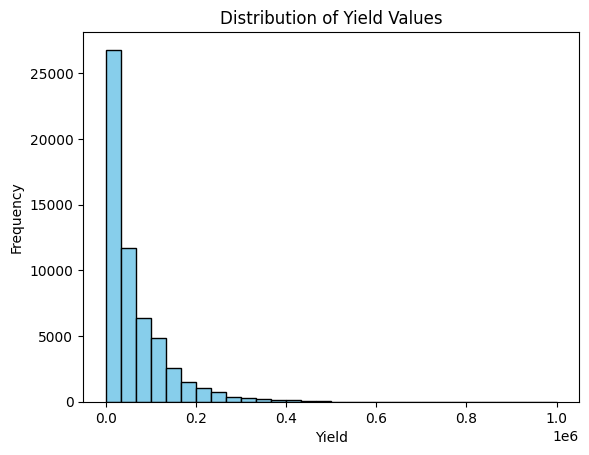

In [20]:
plt.hist(crop['Value'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Yield Values')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()


Value range: 0 - 1000000


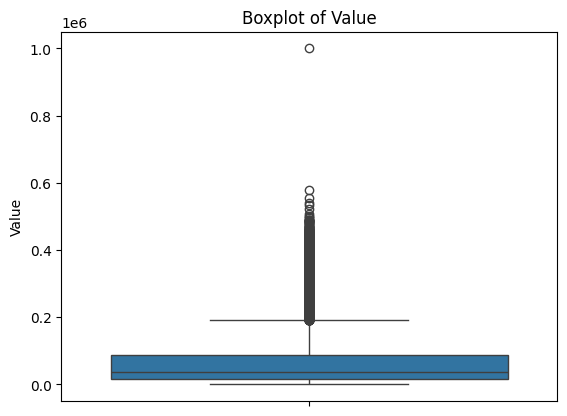

In [21]:
print(f"Value range: {crop['Value'].min()} - {crop['Value'].max()}")
sns.boxplot(crop['Value'])
plt.title("Boxplot of Value")
plt.show()


#### Value range(Yield)

In [22]:
print(f"Yield Value range: {crop['Value'].min()} - {crop['Value'].max()}")


Yield Value range: 0 - 1000000


## **Clean and Prepare Data**

In [23]:
crop.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [24]:
# Keep a copy of the dataset for visualization
data_for_viz = crop.copy()

# Drop unnecessary columns only for modeling
columns_to_drop = ['Domain Code', 'Area Code', 'Element Code', 'Item Code', 'Year Code']
data_cleaned = crop.drop(columns=columns_to_drop, axis=1)

# Use `data_for_viz` for visualizations when needed


In [25]:
data_cleaned.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

#### Handle rare category

In [26]:
# Handle rare categories for 'Area' and 'Item' (example threshold: < 5% of total rows)
for col in ['Item']:
    value_counts = data_cleaned[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < 0.05].index
    data_cleaned[col] = data_cleaned[col].replace(rare_categories, 'Other')

# Verify changes
print(data_cleaned['Area'].value_counts())
print(data_cleaned['Item'].value_counts())


Area
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: count, Length: 212, dtype: int64
Item
Maize             8631
Potatoes          7876
Rice, paddy       6469
Sweet potatoes    6356
Wheat             6160
Cassava           5718
Sorghum           5511
Soybeans          4192
Yams              3150
Other             2654
Name: count, dtype: int64


#### Display top area by count

In [27]:
# Display the top 10 areas with their respective counts
top_10_areas = data_cleaned['Area'].value_counts().head(10)
print("Top 10 Areas with their respective counts:")
print(top_10_areas)



Top 10 Areas with their respective counts:
Area
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
Rwanda                                522
Brazil                                504
Colombia                              504
Burundi                               504
Peru                                  504
Name: count, dtype: int64


#### Save Cleaned Dataset

In [28]:
# Save cleaned dataset
data_cleaned.to_csv("/content/drive/MyDrive/dataset/cleaned_yield.csv", index=False)


## **Exploratory Data Analysis(EDA)**

#### Objective of EDA


Exploratory Data Analysis (EDA) aims to uncover patterns, detect anomalies, test hypotheses, and check assumptions about the dataset. It will help you understand relationships between features and the target variable (Value).

#### Chart - 1

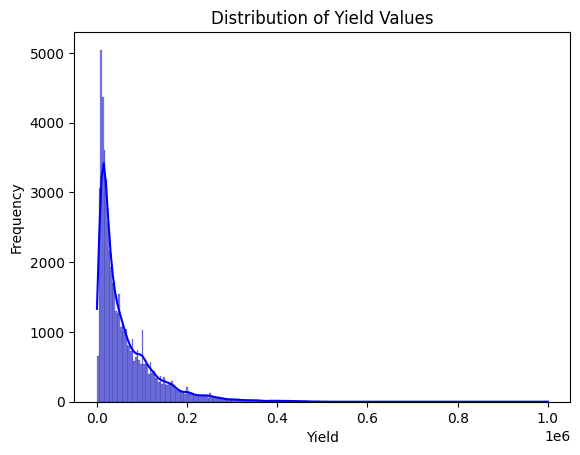

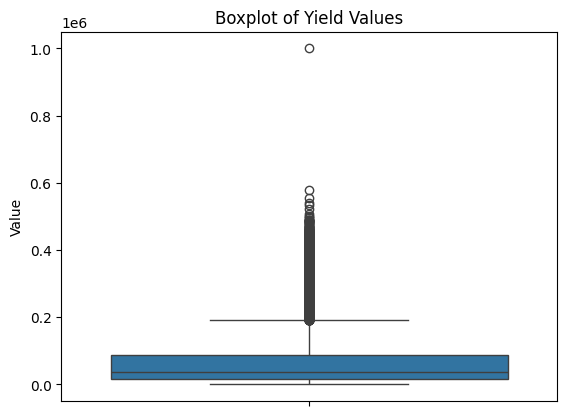

In [29]:
sns.histplot(data_cleaned['Value'], kde=True, color='blue')
plt.title("Distribution of Yield Values")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(data_cleaned['Value'])
plt.title("Boxplot of Yield Values")
plt.show()


#### Chart - 2

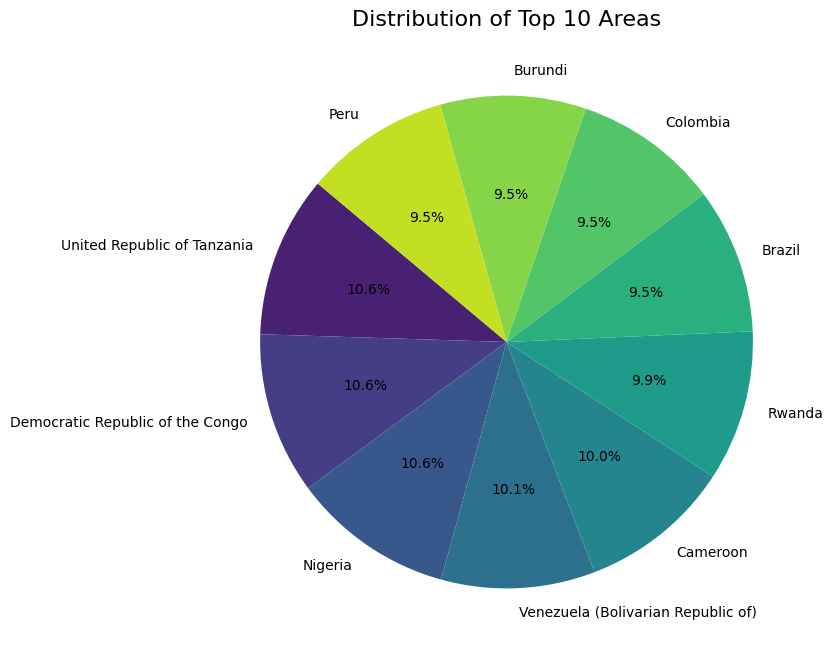

In [30]:
# Plot
plt.figure(figsize=(8, 8))
top_10_areas.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=10))
plt.title("Distribution of Top 10 Areas", fontsize=16)
plt.ylabel("")  # Hide the y-axis label
plt.show()


#### Chart - 3

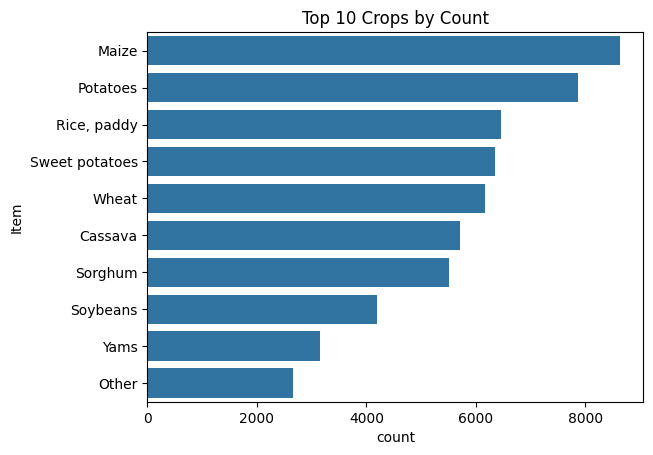

In [31]:
sns.countplot(y=data_cleaned['Item'], order=data_cleaned['Item'].value_counts().index[:10])
plt.title("Top 10 Crops by Count")
plt.show()


#### Chart - 4

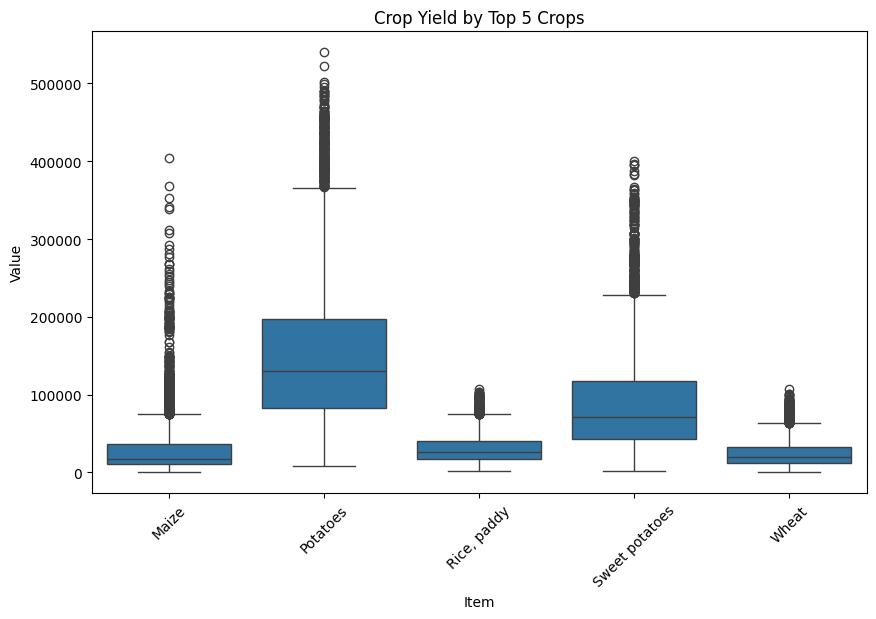

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=data_cleaned, order=data_cleaned['Item'].value_counts().index[:5])
plt.title("Crop Yield by Top 5 Crops")
plt.xticks(rotation=45)
plt.show()


#### Chart - 5

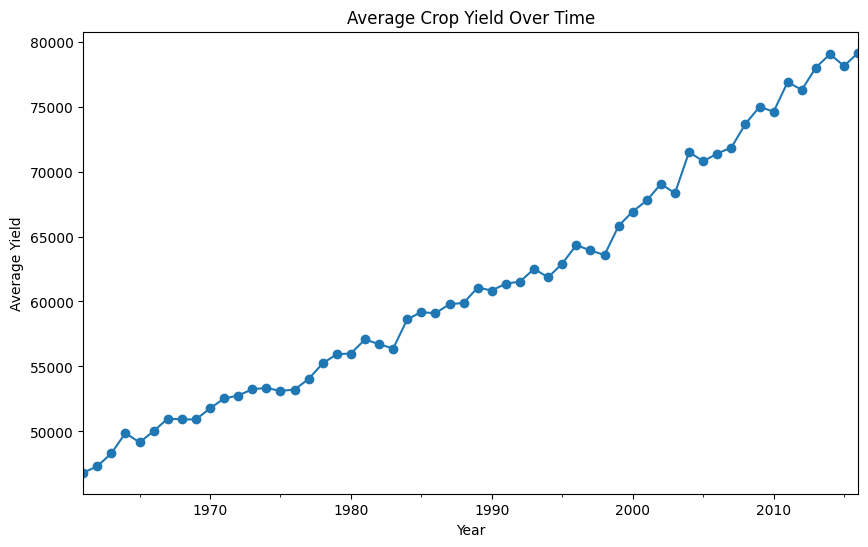

In [33]:
data_cleaned.groupby('Year')['Value'].mean().plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Average Crop Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Average Yield")
plt.show()


#### Chart - 6

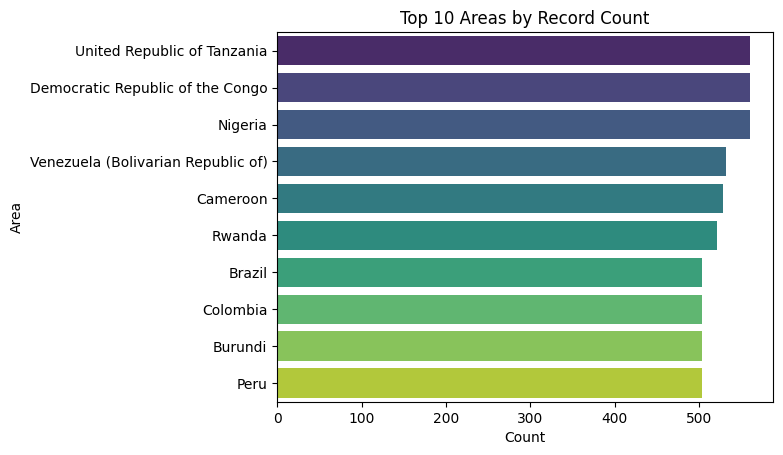

In [34]:
top_10_areas = data_cleaned['Area'].value_counts().head(10)
sns.barplot(x=top_10_areas.values, y=top_10_areas.index, palette='viridis')
plt.title("Top 10 Areas by Record Count")
plt.xlabel("Count")
plt.ylabel("Area")
plt.show()


#### Chart - 7

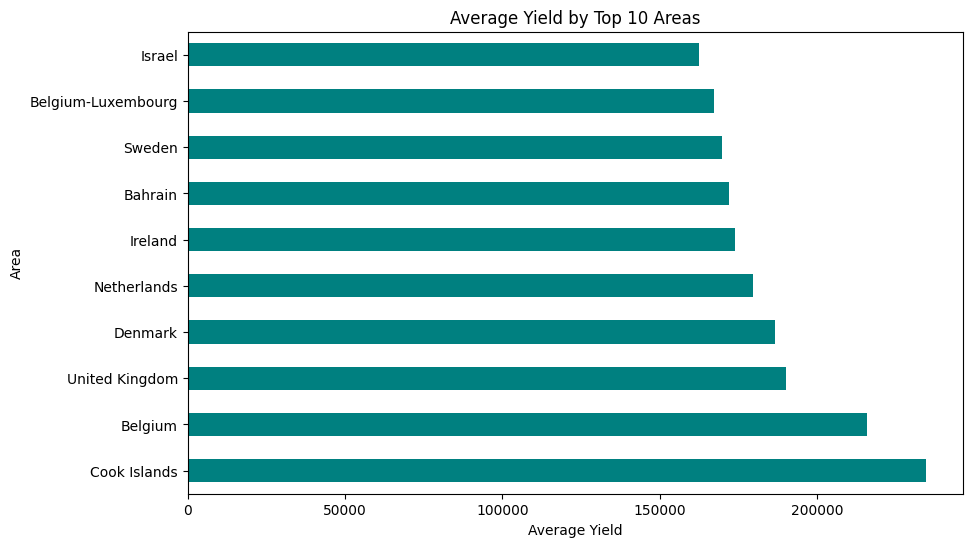

In [35]:
avg_yield_by_area = data_cleaned.groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)
avg_yield_by_area.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Average Yield by Top 10 Areas")
plt.xlabel("Average Yield")
plt.ylabel("Area")
plt.show()


#### Chart - 8

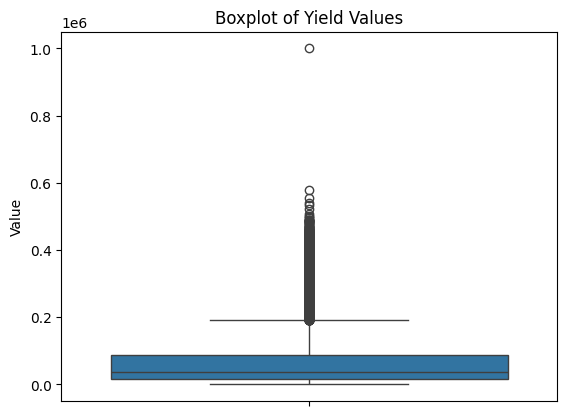

In [36]:
sns.boxplot(data_cleaned['Value'])
plt.title("Boxplot of Yield Values")
plt.show()

q1 = data_cleaned['Value'].quantile(0.01)
q99 = data_cleaned['Value'].quantile(0.99)
data_cleaned['Value'] = data_cleaned['Value'].clip(lower=q1, upper=q99)


#### Chart - 9

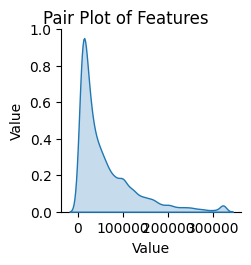

In [37]:
# Pair Plot
sns.pairplot(data_cleaned, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()


#### Chart - 10

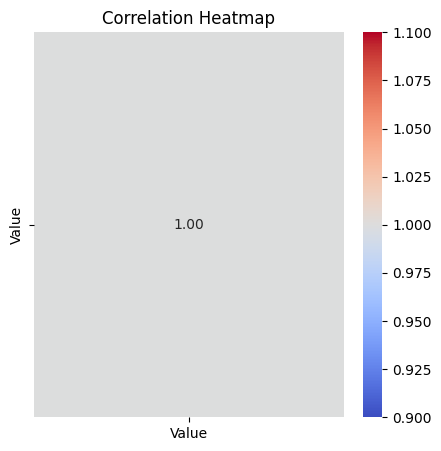

In [39]:
# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(5, 5))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## **Conclusion**